In [ ]:
"""
zに1要素のガウスを適用
zに1要素の2点のガウスの適応を試みるが、うまくいかない

NEXT
aに1要素のガウス、bに1要素のガウスを適応する
前提：aとbは同一空間上に存在している　Λ　aとbは独立である

それぞれが独立して拡散する事を確認する

NEXT
aに1要素のガウス、bに1要素のガウスを適応する
前提：aとbは同一空間上に存在している　Λ　aとbは相互作用をとる
  ここでは、a-lb , b-la とする

抑制が生じる事を確認する

"""

'\nzに1要素のガウスを適用\nzに1要素の2点のガウスの適応を試みるが、うまくいかない\n\nNEXT\naに1要素のガウス、bに1要素のガウスを適応する\n前提：aとbは同一空間上に存在している\u3000Λ\u3000aとbは独立である\n\nそれぞれが独立して拡散する事を確認する\n\nNEXT\naに1要素のガウス、bに1要素のガウスを適応する\n前提：aとbは同一空間上に存在している\u3000Λ\u3000aとbは相互作用をとる\n  ここでは、a-lb , b-la とする\n\n抑制が生じる事を確認する\n\n'

In [ ]:
引数のlist化
dir？、消してみる

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os
import glob
import matplotlib.pyplot as plt

In [5]:
def initial_field(x, y, x_max, y_max, dx, dy):

    # 初期場(x方向をi, y方向をjとする行列を作成→2D画像のデータ構造を模擬)
    #x, y = np.linspace(0, x_max, int(x_max / dx)), np.linspace(0, y_max, int(y_max / dy))
    z = np.zeros((len(y), len(x)))

    # 2D Gaussian(sigma:分散共分散行列, mu:平均ベクトル)
    sigma11, sigma22, sigma12, sigma21 = 0.3, 0.3, 0, 0
    sigma = np.array([[sigma11, sigma12],
                      [sigma21, sigma22]])
    det_sigma = np.linalg.det(sigma)
    inv_sigma = np.linalg.inv(sigma)


    """ Temprate
    mu_x, mu_y = 1.0, 3.0
    mu = np.array([mu_x, mu_y])

    # 式のi,jの順番と同じにするため転置させて計算する

    def za(z):
       za = z.T
       for i in range(len(z)):
           for j in range(len(z.T)):
               Xa = np.array([x[i], y[j]])
               za[i, j] = (1 / np.sqrt(2 * np.pi * det_sigma)) * np.exp((-1 / 2) * (Xa - mu).T @ inv_sigma @ (Xa - mu))
       return za
    """

    def get_wus(z, mu_wus_x, mu_wus_y):
       mu_wus = np.array([mu_wus_x, mu_wus_y])

       def z_wus(z):
            z_wus = z.T
            for i in range(len(z)):
                for j in range(len(z.T)):
                    Xa = np.array([x[i], y[j]])
                    z_wus[i, j] = (1 / np.sqrt(2 * np.pi * det_sigma)) * np.exp((-1 / 2) * (Xa - mu_wus).T @ inv_sigma @ (Xa - mu_wus))
            return z_wus

       zz_wus = z_wus(z)
       zzz_wus = zz_wus.T

       return zzz_wus


    def get_clv(z, mu_clv_x, mu_clv_y):
       mu_clv = np.array([mu_clv_x, mu_clv_y])

       def z_clv(z):
            z_clv = z.T
            for i in range(len(z)):
                for j in range(len(z.T)):
                    Xa = np.array([x[i], y[j]])
                    z_clv[i, j] = (1 / np.sqrt(2 * np.pi * det_sigma)) * np.exp((-1 / 2) * (Xa - mu_clv).T @ inv_sigma @ (Xa - mu_clv))
            return z_clv

       zz_clv = z_clv(z)
       zzz_clv = zz_clv.T

       return zzz_clv

    mu_wus_x, mu_wus_y = 1.0, 1.0
    zzz_wus = get_wus(z, mu_wus_x, mu_wus_y)

    #mu_clv_x, mu_clv_y = 4.0, 4.0
    #zzz_clv = get_clv(z, mu_clv_x, mu_clv_y)

    #print(type(zz_wus))
    #print(zz_wus.shape)

    return zzz_wus

def boundary_condition(a):

    # 境界条件(左右上下)
    a[:, 0], a[:, -1], a[0, :], a[-1, :] = 0, 0, 0, 0

    return a

def sol_2d_diffusion(x, y, q, pull):
    ''' 2次元拡散方程式を計算する '''

    dt, dx, dy, a, step, result_interval =\
       pull[0], pull[1], pull[2], pull[3], pull[4], pull[5]


    # 漸化式を反復計算
    q = q.T
    for n in range(step):
        q0 = q.copy()
        for i in range(1, len(q) - 1):
            for j in range(1, len(q.T) - 1):
                r = a * (dt / dx ** 2)
                s = a * (dt / dy ** 2)
                q[i, j] = q0[i, j] + r * (q0[i+1, j] - 2 * q0[i, j] + q0[i-1, j]) + \
                          s * (q0[i, j+1] - 2 * q0[i, j] + q0[i, j-1])
        # 境界条件を設定
        q = q.T
        q = boundary_condition(q)
        q = q.T

        # 指定した間隔で画像保存
        if n % result_interval == 0:
            print('Iteration=', n)
            q = q.T
            plot(x, y, q, n, 1)
            q = q.T

    return

In [3]:
def plot(x, y, z, n, save_flag):
    ''' 関数をプロットする '''

    plt.rcParams['font.size'] = 14

    # scale inside
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    x_size = 8
    y_size = int(0.8 * x_size * (np.max(y) / np.max(x)))
    fig = plt.figure(figsize=(x_size, y_size))
    ax1 = fig.add_subplot(111)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.set_xlabel('x_label')
    ax1.set_ylabel('y_label')

    # データをプロットする。
    im = ax1.imshow(z,
                    vmin=0, vmax=1,
                    extent=[np.min(x), np.max(x), np.min(y), np.max(y)],
                    aspect='auto', cmap='jet')

    ax1.text(0.1, 0.1, 'Step='+str(n), color="white")

    # カラーバーを設定する。
    cbar = fig.colorbar(im)
    cbar.set_label('q')

    plt.show()

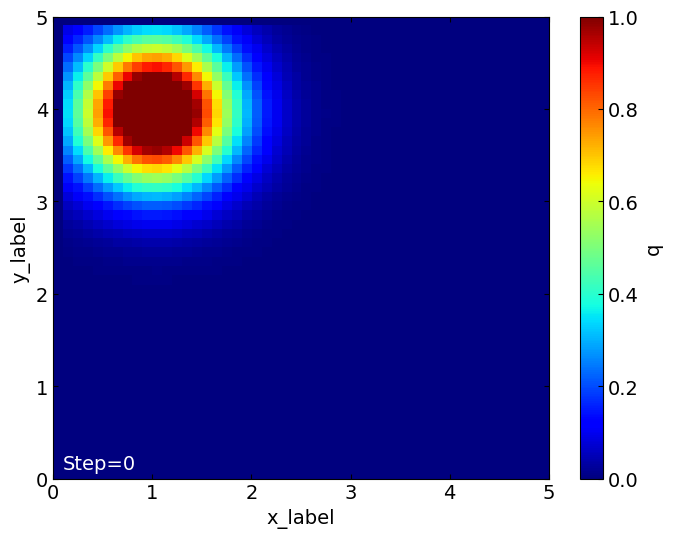

nu_x, nu_y= 0.04999999999999999 0.04999999999999999
Iteration= 0


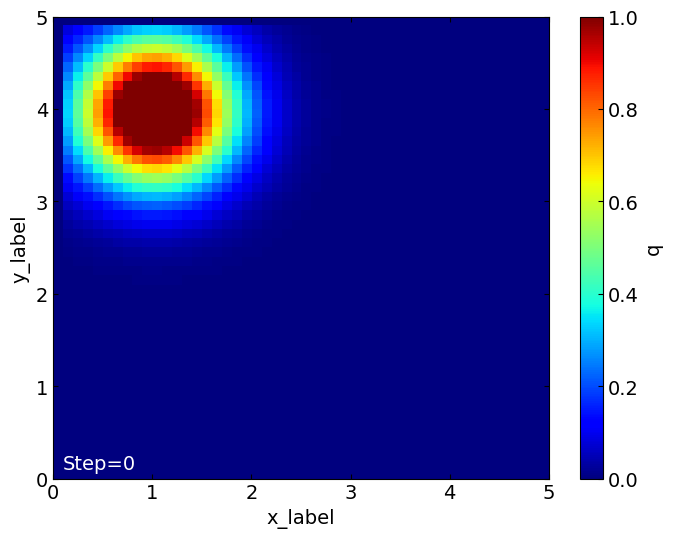

Iteration= 100


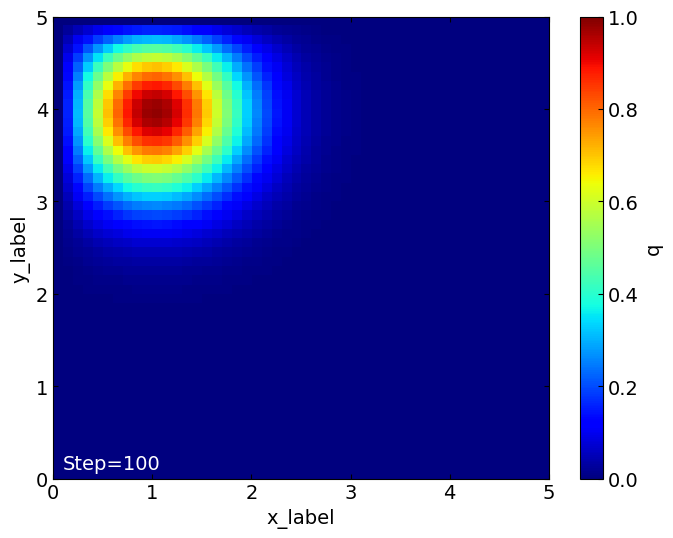

Iteration= 200


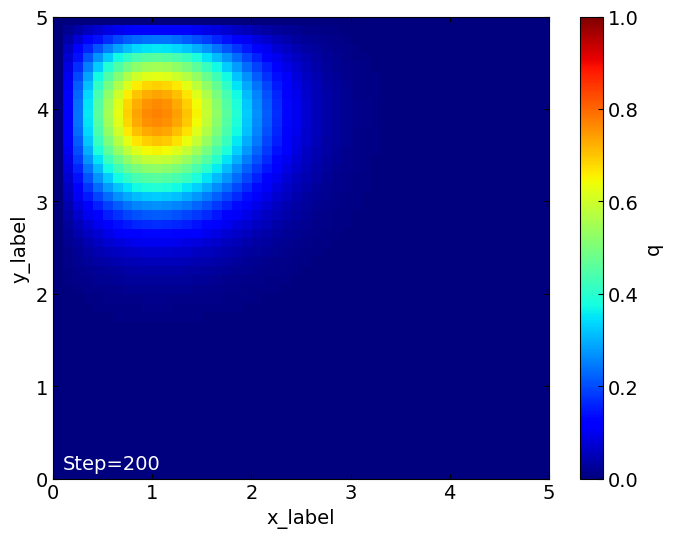

Iteration= 300


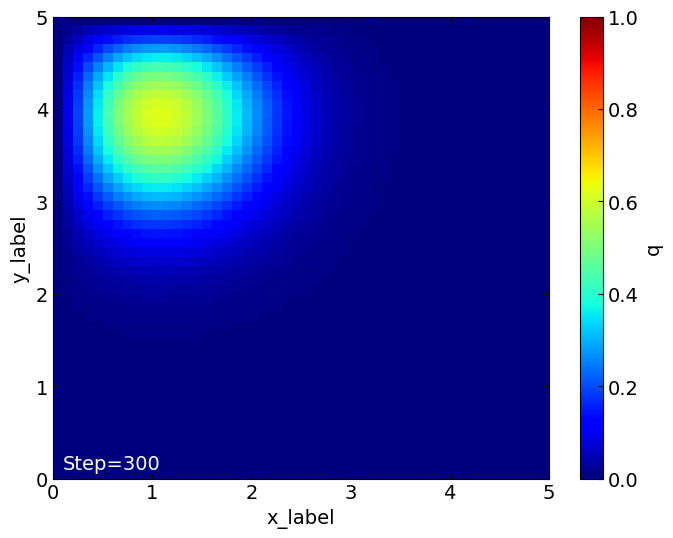

Iteration= 400


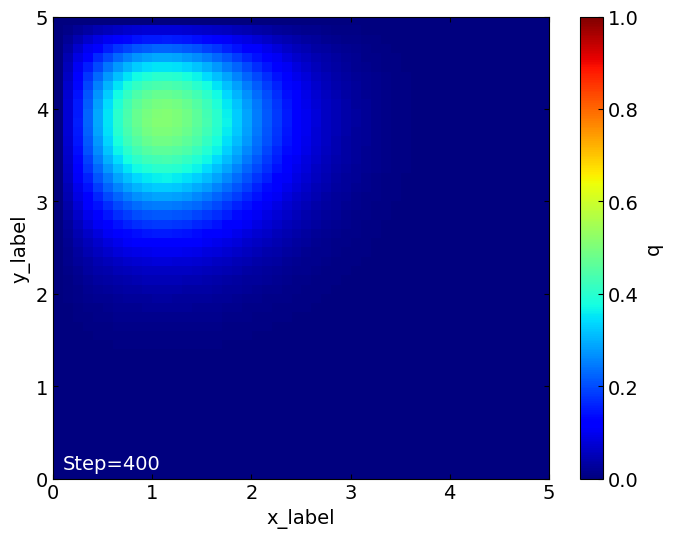

In [6]:
if __name__ == '__main__':

    # Parameter

    dt = 0.0005  # Time

    # Space
    x_max, y_max = 5, 5  # range
    dx, dy = 0.1, 0.1  # divide
    a = 1  # 拡散係数


  # Calculation condition
    step = 500
    result_interval = 100

    # Initial field
    x, y = np.linspace(0, x_max, int(x_max / dx)), np.linspace(0, y_max, int(y_max / dy))
    q = initial_field(x, y, x_max, y_max, dx, dy)
    #plot(x, y, q, 0, dir, 0)

    # 境界条件を設定する
    q = boundary_condition(q)
    plot(x, y, q, 0, 0)


    #引数list
    pull = [dt, dx, dy, a, step, result_interval]


    # 安定性の確認
    nu_x, nu_y = a * dt / dx ** 2, a * dt / dy ** 2
    print('nu_x, nu_y=', nu_x, nu_y)

    # 計算を実行
    sol_2d_diffusion(x, y, q, pull)